In [1]:
import qiskit as Q

Q.IBMQ.enable_account('de7a4cc5888f444759d6c4c1f6ec929f7ab6676fee9bb6a51983eefe7813cb9cd99c8ccbac4e97c2f11c0fdda245e55ecb698cd69d9a7fb61925442d2781c8ad')

Microsoft Visual C++ Redistributable is not installed, this may lead to the DLL load failure.
                 It can be downloaded at https://aka.ms/vs/16/release/vc_redist.x64.exe


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

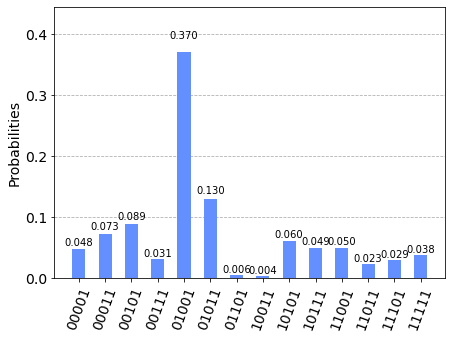

In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

qr = Q.QuantumRegister(6)
cr = Q.ClassicalRegister(5)
qc = Q.QuantumCircuit(qr,cr)
qc.z([0])
for i in range(15):
    qc.h([0])
    qc.cx([0],[1])
    qc.x([1])
    qc.ccx([0],[1],[2])
    qc.x([2])
    qc.mcx([0,1,2],[3])
    qc.x([3])
    qc.mcx([0,1,2,3],[4])
    qc.x([4])
    qc.mcx([0,1,2,3,4],[5])
    qc.x([0])
    qc.mcx([0,1,2,3,4],[5])
    qc.x([4])
    qc.mcx([0,1,2,3],[4])
    qc.x([3])
    qc.mcx([0,1,2],[3])
    qc.x([2])
    qc.ccx([0],[1],[2])
    qc.x([1])
    qc.cx([0],[1])


#qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[0])
qc.measure(qr[2],cr[1])
qc.measure(qr[3],cr[2])
qc.measure(qr[4],cr[3])
qc.measure(qr[5],cr[4])

#print(qc)


# plot random generator probability distribution
provider = Q.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
qcomp = provider.get_backend('ibmq_qasm_simulator')
job = Q.execute(qc , backend = qcomp , shots = 4096)
counts = job.result().get_counts()
#print(counts)
plot_histogram(counts)




In [3]:
def qrandint():
    provider = Q.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
    qcomp = provider.get_backend('ibmq_qasm_simulator')
    job = Q.execute(qc , backend = qcomp , shots = 1)
   
    result = job.result().get_counts()
    print(result)
    
    key, = result
    
    return int(key, 2)
    

In [4]:
import random 


total = 0

bucket_len = 32
N = 10 # number of simultaion
M = 100 # number of bonding attempts in each simultaion


x = []
y = []

for i in range(N):
    
    buckets = []
    for i in range(bucket_len):
        buckets.append(0)


    for i in range(M): # could collide infinitely 
        #idx = random.randint(0, 8)
        idx = qrandint()
        if(idx != 31 and buckets[idx] != 1 and buckets[idx+1] != 1):
            buckets[idx] = 1
            buckets[idx+1] = 1
        
        if i % 10 == 9:
            r = sum(buckets) / bucket_len
            print(r)
            
            x.append(i)
            y.append(r)
            
 
     

    print(buckets)

    ans = sum(buckets) / bucket_len
    print(ans)


    total = total + ans

expectation  = total / N
print(expectation)


    


{'01001': 1}
{'01001': 1}
{'01001': 1}
{'11101': 1}
{'01001': 1}
{'01011': 1}
{'01001': 1}
{'01001': 1}
{'01001': 1}
{'00011': 1}
0.25
{'01001': 1}
{'00011': 1}
{'10101': 1}
{'00101': 1}
{'01001': 1}
{'01001': 1}
{'00101': 1}
{'01001': 1}
{'01001': 1}
{'00101': 1}
0.375
{'10101': 1}
{'01001': 1}
{'01001': 1}
{'10111': 1}
{'01001': 1}
{'11001': 1}
{'00111': 1}
{'10101': 1}
{'01001': 1}
{'11001': 1}
0.5625
{'01011': 1}
{'01001': 1}
{'01011': 1}
{'01001': 1}
{'01001': 1}
{'01001': 1}
{'01001': 1}
{'00101': 1}
{'01001': 1}
{'00001': 1}
0.625
{'01001': 1}
{'01001': 1}
{'01001': 1}
{'00111': 1}
{'01001': 1}
{'10111': 1}
{'00101': 1}
{'00111': 1}
{'01001': 1}
{'01001': 1}
0.625
{'01011': 1}
{'01001': 1}
{'01011': 1}
{'00011': 1}
{'00011': 1}
{'00111': 1}
{'01001': 1}
{'01011': 1}
{'01011': 1}
{'00011': 1}
0.625
{'01011': 1}
{'01011': 1}
{'00101': 1}
{'10111': 1}
{'01011': 1}
{'00001': 1}
{'00101': 1}
{'01001': 1}
{'11111': 1}
{'01001': 1}
0.625
{'11011': 1}
{'01001': 1}
{'11011': 1}
{'11111':

KeyboardInterrupt: 

Text(0, 0.5, 'cover rate')

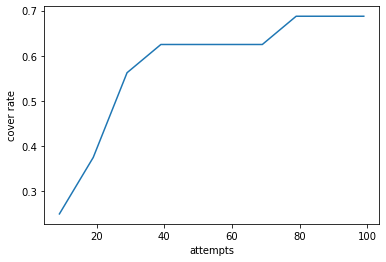

In [5]:
plt.plot(x, y)
plt.xlabel('attempts')
plt.ylabel('cover rate')
